<a href="https://colab.research.google.com/github/roydon-p/Stock-Market-Prediction/blob/main/FAI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
from pandas import DataFrame
from pandas import concat
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

# New section

In [ ]:
data = pd.read_csv('GOOGL_Train.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-05,536.700012,538.200012,527.260010,528.080017,528.080017,3070100
1,2014-12-08,529.219971,533.820007,527.000000,530.729980,530.729980,3228300
2,2014-12-09,525.880005,536.650024,523.409973,536.109985,536.109985,2166100
3,2014-12-10,535.900024,539.359985,527.489990,528.039978,528.039978,2311100
4,2014-12-11,530.010010,537.039978,529.159973,532.109985,532.109985,2071300


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       755 non-null    object 
 1   Open       755 non-null    float64
 2   High       755 non-null    float64
 3   Low        755 non-null    float64
 4   Close      755 non-null    float64
 5   Adj Close  755 non-null    float64
 6   Volume     755 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 41.4+ KB


In [ ]:
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [ ]:
##MY test
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
##MY test
# load dataset
#dataset = read_csv('pollution.csv', header=0, index_col=0)
data.info()
values = data
# integer encode direction
#encoder = LabelEncoder()
#values[:,1:7] = encoder.fit_transform(values[:,1:7])
values = data.iloc[:,1:7].values
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = DataFrame(scaled)#series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())
values = reframed.values
#n_train_hours = 365 * 24
#train = values[:n_train_hours, :]
#test = values[n_train_hours:, :]
## split into input and outputs
#train_X, train_y = train[:, :-1], train[:, -1]
#test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755 entries, 0 to 754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       755 non-null    object 
 1   Open       755 non-null    float64
 2   High       755 non-null    float64
 3   Low        755 non-null    float64
 4   Close      755 non-null    float64
 5   Adj Close  755 non-null    float64
 6   Volume     755 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 47.2+ KB
          0         1         2         3         4         5
0  0.065176  0.065411  0.064466  0.053953  0.053953  0.206646
1  0.052162  0.057856  0.064005  0.058562  0.058562  0.219469
2  0.046351  0.062737  0.057638  0.067919  0.067919  0.133374
3  0.063784  0.067412  0.064874  0.053883  0.053883  0.145127
4  0.053536  0.063410  0.067836  0.060962  0.060962  0.125690


In [ ]:
##MY test
X_train1 = []
y_train1 = []

print(values)

for i in range (29,754): #60 : timestep // 754 : length of the data
    X_train1.append(values[i-29:i,:]) 
    y_train1.append(values[i,4])

X_train1,y_train1 = np.array(X_train1),np.array(y_train1)
print(X_train1.shape, y_train1.shape)

[[0.0651762  0.06541091 0.06446637 0.05395255 0.05395255 0.2066464 ]
 [0.05216178 0.05785553 0.06400524 0.05856158 0.05856158 0.2194691 ]
 [0.04635061 0.06273723 0.05763836 0.06791893 0.06791893 0.13337386]
 ...
 [0.94075677 0.93814258 0.95619467 0.93766421 0.93766421 0.14054711]
 [0.92417581 0.92624024 0.93283795 0.91835801 0.91835801 0.11084093]
 [0.91963473 0.91606287 0.91921745 0.89539958 0.89539958 0.11495846]]
(725, 29, 6) (725,)


In [ ]:
##MY test
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train1.shape[1],X_train1.shape[2])))
model.add(Dropout(0.1))

model.add(LSTM(units=100, return_sequences = True))
# model.add(Dropout(0.1))

model.add(LSTM(units=100, return_sequences = True))
#model.add(Dropout(0.1))

model.add(LSTM(units=100, return_sequences = False))
#model.add(Dropout(0.1))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
hist = model.fit(X_train1, y_train1, epochs = 50, batch_size = 72, verbose=2)

Epoch 1/50
11/11 - 8s - loss: 0.0632 - 8s/epoch - 741ms/step
Epoch 2/50
11/11 - 2s - loss: 0.0109 - 2s/epoch - 150ms/step
Epoch 3/50
11/11 - 2s - loss: 0.0053 - 2s/epoch - 147ms/step
Epoch 4/50
11/11 - 2s - loss: 0.0035 - 2s/epoch - 149ms/step
Epoch 5/50
11/11 - 2s - loss: 0.0034 - 2s/epoch - 148ms/step
Epoch 6/50
11/11 - 2s - loss: 0.0032 - 2s/epoch - 149ms/step
Epoch 7/50
11/11 - 2s - loss: 0.0027 - 2s/epoch - 149ms/step
Epoch 8/50
11/11 - 2s - loss: 0.0025 - 2s/epoch - 148ms/step
Epoch 9/50
11/11 - 2s - loss: 0.0025 - 2s/epoch - 148ms/step
Epoch 10/50
11/11 - 2s - loss: 0.0023 - 2s/epoch - 148ms/step
Epoch 11/50
11/11 - 2s - loss: 0.0026 - 2s/epoch - 149ms/step
Epoch 12/50
11/11 - 2s - loss: 0.0026 - 2s/epoch - 148ms/step
Epoch 13/50
11/11 - 2s - loss: 0.0028 - 2s/epoch - 146ms/step
Epoch 14/50
11/11 - 2s - loss: 0.0024 - 2s/epoch - 147ms/step
Epoch 15/50
11/11 - 2s - loss: 0.0022 - 2s/epoch - 146ms/step
Epoch 16/50
11/11 - 2s - loss: 0.0021 - 2s/epoch - 147ms/step
Epoch 17/50
11/11

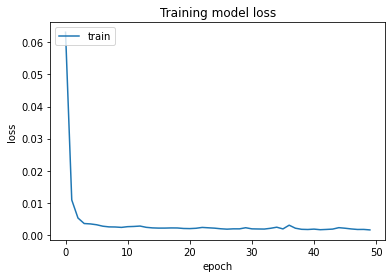

In [ ]:
##MY test
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
## mytest
testData = pd.read_csv('GOOGL_Test.csv')
testData = testData.dropna()
testData = testData.iloc[:,1:7]
print(testData)
y_test1 = testData.iloc[60:,4:5].values 
print(y_test1)
#input array for the model
inputClosing = testData.values 
inputClosing_scaled = scaler.transform(inputClosing)
inputClosing_scaled.shape
print(inputClosing_scaled.shape)
X_test1 = []
length = len(testData)
timestep = 29
for i in range(timestep,length):  
    X_test1.append(inputClosing_scaled[i-timestep:i,:])
X_test1 = np.array(X_test,(X_test.shape[0],X_test.shape[1],1))
X_train1,y_train1 = np.array(X_train1),np.array(y_train1)
print(X_train1.shape, y_train1.shape)
X_test1.shape

            Open         High          Low        Close    Adj Close   Volume
0    1045.000000  1079.420044  1042.479980  1078.079956  1078.079956  2371800
1    1072.229980  1085.030029  1039.369995  1046.579956  1046.579956  2134100
2    1042.939941  1059.599976  1033.000000  1053.180054  1053.180054  1682600
3    1066.939941  1070.400024  1050.099976  1061.650024  1061.650024  1692600
4    1077.079956  1091.729980  1071.969971  1073.729980  1073.729980  1448000
..           ...          ...          ...          ...          ...      ...
750  2880.000000  2925.949951  2877.870117  2910.610107  2910.610107  1629800
751  2900.169922  2920.000000  2832.030029  2837.949951  2837.949951  2103400
752  2880.000000  2919.010010  2818.239990  2821.030029  2821.030029  1701000
753  2825.000000  2877.290039  2804.290039  2859.320068  2859.320068  1459700
754  2873.620117  2888.000000  2806.020020  2840.030029  2840.030029  2060800

[755 rows x 6 columns]
[[1164.939941]
 [1150.849976]
 [1149.969

AttributeError: ignored

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       755 non-null    object 
 1   Open       755 non-null    float64
 2   High       755 non-null    float64
 3   Low        755 non-null    float64
 4   Close      755 non-null    float64
 5   Adj Close  755 non-null    float64
 6   Volume     755 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 41.4+ KB


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(755, 1)

In [ ]:
X_train = []
y_train = []

for i in range (60,754): #60 : timestep // 754 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)
X_train.shape

(694, 60)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(694,)

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.1))

model.add(LSTM(units=100, return_sequences = True))
# model.add(Dropout(0.1))

model.add(LSTM(units=100, return_sequences = True))
#model.add(Dropout(0.1))

model.add(LSTM(units=100, return_sequences = False))
#model.add(Dropout(0.1))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
hist = model.fit(X_train, y_train, epochs = 40, batch_size = 32, verbose=2)

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
testData = pd.read_csv('GOOGL_Test.csv')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
print(y_test)
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

[[1164.939941]
 [1150.849976]
 [1149.969971]
 [1179.26001 ]
 [1197.25    ]
 [1199.060059]
 [1192.530029]
 [1190.300049]
 [1188.550049]
 [1202.459961]
 [1226.430054]
 [1236.130005]
 [1207.650024]
 [1197.380005]
 [1189.839966]
 [1178.01001 ]
 [1172.27002 ]
 [1176.890015]
 [1198.97998 ]
 [1205.540039]
 [1210.810059]
 [1219.449951]
 [1211.449951]
 [1208.280029]
 [1202.689941]
 [1206.449951]
 [1209.589966]
 [1222.72998 ]
 [1226.530029]
 [1231.910034]
 [1240.140015]
 [1241.469971]
 [1253.76001 ]
 [1270.589966]
 [1260.050049]
 [1267.339966]
 [1277.420044]
 [1296.199951]
 [1198.959961]
 [1173.319946]
 [1166.51001 ]
 [1189.550049]
 [1193.459961]
 [1178.859985]
 [1170.780029]
 [1167.969971]
 [1167.640015]
 [1136.589966]
 [1124.859985]
 [1170.800049]
 [1184.5     ]
 [1168.780029]
 [1144.660034]
 [1154.439941]
 [1155.849976]
 [1145.339966]
 [1138.609985]
 [1139.560059]
 [1119.939941]
 [1121.410034]
 [1106.5     ]
 [1038.73999 ]
 [1054.48999 ]
 [1044.640015]
 [1047.76001 ]
 [1068.369995]
 [1082.760

(695, 60, 1)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[1.0528786 ],
       [1.0661814 ],
       [1.0780678 ],
       [1.0866889 ],
       [1.094439  ],
       [1.1038976 ],
       [1.1152952 ],
       [1.126798  ],
       [1.1365999 ],
       [1.1435709 ],
       [1.148926  ],
       [1.155611  ],
       [1.1649896 ],
       [1.1733121 ],
       [1.1776445 ],
       [1.176853  ],
       [1.1707218 ],
       [1.1603743 ],
       [1.1484123 ],
       [1.1391412 ],
       [1.1347084 ],
       [1.135496  ],
       [1.1411045 ],
       [1.1490512 ],
       [1.1569911 ],
       [1.1630442 ],
       [1.1670563 ],
       [1.1696371 ],
       [1.1726155 ],
       [1.1768159 ],
       [1.1825007 ],
       [1.1898549 ],
       [1.1981606 ],
       [1.2076188 ],
       [1.2191458 ],
       [1.2307078 ],
       [1.2414557 ],
       [1.2516115 ],
       [1.2627271 ],
       [1.264006  ],
       [1.2513169 ],
       [1.2272216 ],
       [1.1996878 ],
       [1.1746569 ],
       [1.1536973 ],
       [1.1367314 ],
       [1.1234454 ],
       [1.113

In [ ]:
predicted_price = sc.inverse_transform(y_pred)

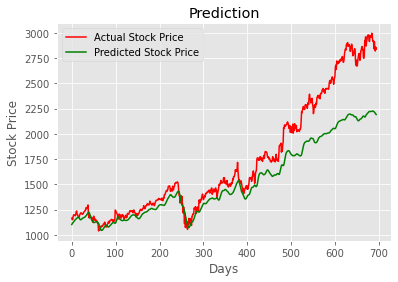

In [ ]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
np.column_stack((y_test,predicted_price,y_test-predicted_price))

array([[1164.939941  , 1102.41259766,   62.52734334],
       [1150.849976  , 1110.06103516,   40.78894084],
       [1149.969971  , 1116.8951416 ,   33.0748294 ],
       ...,
       [2821.030029  , 2203.93188477,  617.09814423],
       [2859.320068  , 2197.08813477,  662.23193323],
       [2840.030029  , 2192.2434082 ,  647.7866208 ]])

Fitting Time: 0:00:00.057505
Prediction Time: 0:00:06.391117
MSE : 336.8579078556271
RMSE : 18.35368921649343


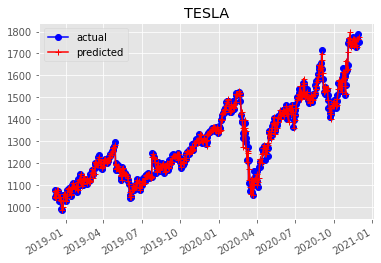

In [ ]:
!pip install hmmlearn
from hmmlearn import hmm
import numpy as np
import pandas as pd
from pandas import DataFrame
import datetime
import hmmlearn
import warnings
import logging
import itertools
import matplotlib.pyplot as grph
#from sklearn.metrics import r2_score 

grph.style.use('ggplot')
warnings.filterwarnings("ignore")
 
 
class HMMStockPredictor(object):
    def __init__(self, stock, hiddenStatesCount=2, latencyDays=10,
                 fChange_steps=3, fHigh_steps=3, fLow_steps=3):
        self.stock = stock
        self.latencyDays = latencyDays
        self.hmm = hmmlearn.hmm.GaussianHMM(n_components=hiddenStatesCount)
        self.initializeTrainTestDataSets()
        self.getAllNextPossibleValues(fChange_steps, fHigh_steps, fLow_steps)
 
    def initializeTrainTestDataSets(self):
        self.trainDS = pd.read_csv('GOOGL_Train.csv'.format(stock=self.stock))
        self.testDS = pd.read_csv('GOOGL_Test.csv'.format(stock=self.stock))

    def getAllNextPossibleValues(self, fChange_steps, fHigh_steps, fLow_steps):
        fChange_range = np.linspace(-0.1, 0.1, fChange_steps)
        fHigh_range = np.linspace(0, 0.1, fHigh_steps)
        fLow_range = np.linspace(0, 0.1, fLow_steps)
        #create vector of the features
        featureVectorAllCombinations = itertools.product(fChange_range, fHigh_range, fLow_range)
        self.possibleNextValues = np.array(list(featureVectorAllCombinations))
        
    
    def fit(self):
        featureVector = HMMStockPredictor.convertDataToFractionFeatures(self,self.trainDS)
        self.hmm.fit(featureVector)

    @staticmethod
    def convertDataToFractionFeatures(self,data):
        #Drop all the data rows that do not have a valid Close Price
        data["Close"] = pd.to_numeric(data.Close,errors='coerce')
        data = data.dropna()

        #convert all valid row values to arrays
        open = np.array(data['Open'])
        close = np.array(data['Close'])
        high = np.array(data['High'])
        low = np.array(data['Low'])

        #convert array values to corresponding fractions to be used as features
        fChange = (close - open) / open
        fHigh = (high - open) / open
        fLow = (open - low) / open
 
        return np.column_stack((fChange, fHigh, fLow))


    def predict(self, days):
        predictedClosePrices = []
        
        #note start time of prediction
        starttime = datetime.datetime.now()
        
        #for each day for the no. of days mentioned, calculate close price
        for curr_day in range(days):
            predictedClosePrices.append(self.predictClosePrice(curr_day))

        #note start time of prediction
        endtime = datetime.datetime.now()
        
        #print total time taken for prediction
        print("Prediction Time: " + str(endtime-starttime))
        
        #calculate Mean Square Error(MSE) and RootMSE
        testData = self.testDS[0: days]
        actualClosePrices = testData['Close']
        sum=0
        for curr_day in range(days):
            sum += np.square(abs(actualClosePrices[curr_day] - predictedClosePrices[curr_day]))
        MSE = sum / days
        print("MSE : "+ str(MSE))
        RMSE = np.sqrt(MSE)
        print("RMSE : "+ str(RMSE))

        #print("R-Square: " + str(r2_score(actualClosePrices, predictedClosePrices)))

        #save predicted vs actual close price in csv file
        results = DataFrame()
        results.insert(0,"Actual values",actualClosePrices)
        results.insert(1,"Predicted values",predictedClosePrices)
        results.to_csv("HMMOutput_ActualVSPredicted" +'.csv')
        
        #plot the graph
        days = np.array(testData['Date'], dtype="datetime64[ms]")
        fig = grph.figure()
        axes = fig.add_subplot(111)
        axes.plot(days, actualClosePrices, 'bo-', label="actual") # blue circles
        axes.plot(days, predictedClosePrices, 'r+-', label="predicted") #red plusses
        axes.set_title('{stock}'.format(stock=self.stock))
        fig.autofmt_xdate()
        grph.legend()
        grph.show()
 
        return predictedClosePrices

    def predictClosePrice(self, day):
        open = self.testDS.iloc[day]['Open']
        predictedFChange, predictedFHigh, predictedFLow = self.getBestScoreOutcome(day)
        return open * (1 + predictedFChange)
 
    def getBestScoreOutcome(self, day):
        #get the data from previous days based on latency day count
        previousDaysData_start = max(0, day - self.latencyDays)
        previousDaysData_end = max(0, day - 1)
      
        #pull data from start index to end index of previous days
        previousDaysData = self.testDS.iloc[previousDaysData_start : previousDaysData_end]

        #convert data to fraction vectors
        previousDaysData_featureVector = HMMStockPredictor.convertDataToFractionFeatures(self,previousDaysData)
 
        allScores = []
        #for all possible variations of next fraction change values, 
        #find the score based on previous days
        for currPossibleOutcomeValue in self.possibleNextValues:
            inputDataToBeScored = np.row_stack((previousDaysData_featureVector, currPossibleOutcomeValue))
            currentInputScore = self.hmm.score(inputDataToBeScored)
            allScores.append(currentInputScore)
        
        bestScoreOutcome = self.possibleNextValues[np.argmax(allScores)]
        return bestScoreOutcome
 
 
#initialize the HMM model and datasets
hmmPredictor = HMMStockPredictor(stock="TESLA")

starttime = datetime.datetime.now()
#train the hmm model
hmmPredictor.fit()
endtime = datetime.datetime.now()

#print time taken for training
print("Fitting Time: " + str(endtime-starttime))

#predict the close prices
prediction = hmmPredictor.predict(500)
